<a href="https://colab.research.google.com/github/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/DT_Probiotics_Data_Champion_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DT Probiotics Data Champion Assignment

* LOOK INTO DATASET [Link](https://github.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/Task_Records.csv)

* Automated Dashboard with Streamlit [Link](https://github.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/blob/main/Task_Records.csv)


******

# 1. Cleaning and Pre-Processing  


In [29]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from google.colab import files
from sklearn.metrics import accuracy_score, mean_squared_error

In [19]:
# 2. Load the Dataset
url = "https://raw.githubusercontent.com/Rahulaggl/DT-Probiotics-Data-Champion-Assignment/main/Task_Records.csv"
df = pd.read_csv(url)
print("Initial Data:")
print(df.head())

Initial Data:
   Company_ID Company_Name    Industry  Revenue  Growth_Rate   Location
0         NaN   Company_16      Retail      NaN          NaN     Canada
1         NaN   Company_34   Education      NaN         0.74  Australia
2         3.0   Company_32     Finance      NaN          NaN      India
3         NaN   Company_36   Education      NaN          NaN  Australia
4         5.0    Company_1  Technology      NaN        35.64  Australia


In [20]:
# 3. Clean and Preprocess the Data
# Drop duplicates
df_cleaned = df.drop_duplicates()

# Handle missing values
df_cleaned['Revenue'] = df_cleaned['Revenue'].fillna(df_cleaned['Revenue'].mean())
df_cleaned['Growth_Rate'] = df_cleaned['Growth_Rate'].fillna(df_cleaned['Growth_Rate'].mean())
df_cleaned['Company_ID'] = df_cleaned['Company_ID'].fillna(-1)

# 2. Create a View and Visualize the Results

using Scatter Plot

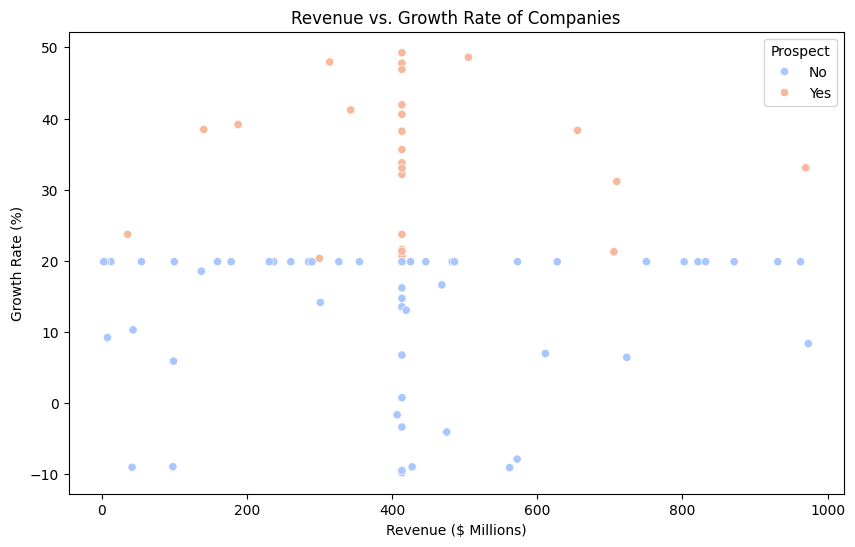

In [22]:
# 4. Create a View to Identify Prospect Companies
df_cleaned['Prospect'] = df_cleaned['Growth_Rate'].apply(lambda x: 'Yes' if x > 20 else 'No')

# 5. Visualize the Results (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Revenue', y='Growth_Rate', hue='Prospect', palette='coolwarm')
plt.title("Revenue vs. Growth Rate of Companies")
plt.xlabel("Revenue ($ Millions)")
plt.ylabel("Growth Rate (%)")
plt.legend(title="Prospect")
plt.show()


In [23]:
# 6. Save the Processed Data
df_cleaned.to_csv("Processed_Prospect_Companies.csv", index=False)

#3. Advanced Machine Learning Models

1.   Logistic Regression Model
2.   Decision Trees
3.   Random Forest
4.   Gradient Boosting


In [24]:
# 7. Apply Machine Learning for Further Insights
# One-hot encode categorical features
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Check the columns of the encoded dataframe
print("Encoded DataFrame Columns:")
print(df_encoded.columns)

# Prepare features and labels
columns_to_drop = ['Company_ID', 'Company_Name', 'Prospect']
columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]  # Avoid dropping missing columns

X = df_encoded.drop(columns=columns_to_drop)
y = df_cleaned['Prospect'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Encoded DataFrame Columns:
Index(['Company_ID', 'Revenue', 'Growth_Rate', 'Company_Name_Company_10',
       'Company_Name_Company_11', 'Company_Name_Company_12',
       'Company_Name_Company_13', 'Company_Name_Company_14',
       'Company_Name_Company_16', 'Company_Name_Company_18',
       'Company_Name_Company_19', 'Company_Name_Company_2',
       'Company_Name_Company_20', 'Company_Name_Company_21',
       'Company_Name_Company_22', 'Company_Name_Company_23',
       'Company_Name_Company_24', 'Company_Name_Company_25',
       'Company_Name_Company_26', 'Company_Name_Company_28',
       'Company_Name_Company_29', 'Company_Name_Company_3',
       'Company_Name_Company_30', 'Company_Name_Company_31',
       'Company_Name_Company_32', 'Company_Name_Company_33',
       'Company_Name_Company_34', 'Company_Name_Company_36',
       'Company_Name_Company_37', 'Company_Name_Company_39',
       'Company_Name_Company_4', 'Company_Name_Company_41',
       'Company_Name_Company_43', 'Company_Name_

In [31]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"Logistic Regression Model Accuracy: {log_accuracy:.2f}")


Logistic Regression Model Accuracy: 0.95


In [32]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")


Decision Tree Model Accuracy: 1.00


In [33]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")


Random Forest Model Accuracy: 1.00


In [34]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Model Accuracy: 1.00


# 4. Create Visualizations



1.   Correlation matrix heatmap
2.   Distribution of prospects by industry
3.   Distribution of prospects by location
4.   Download the Processed Data (if using Colab)


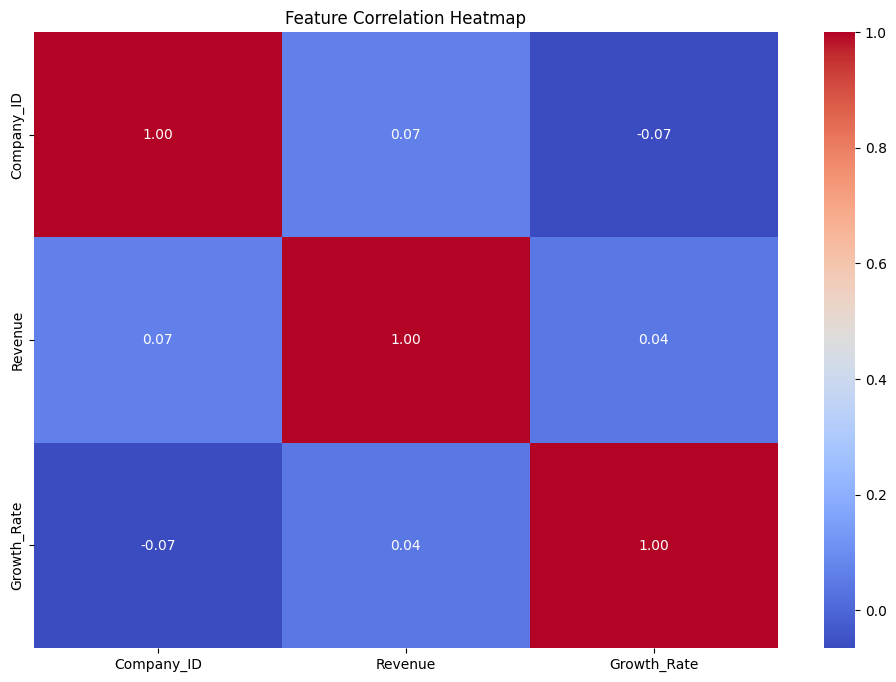

In [35]:
# 8. Create Visualizations
# Correlation matrix heatmap
df_numeric = df_cleaned.select_dtypes(include=[np.number])  # Only numeric columns
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

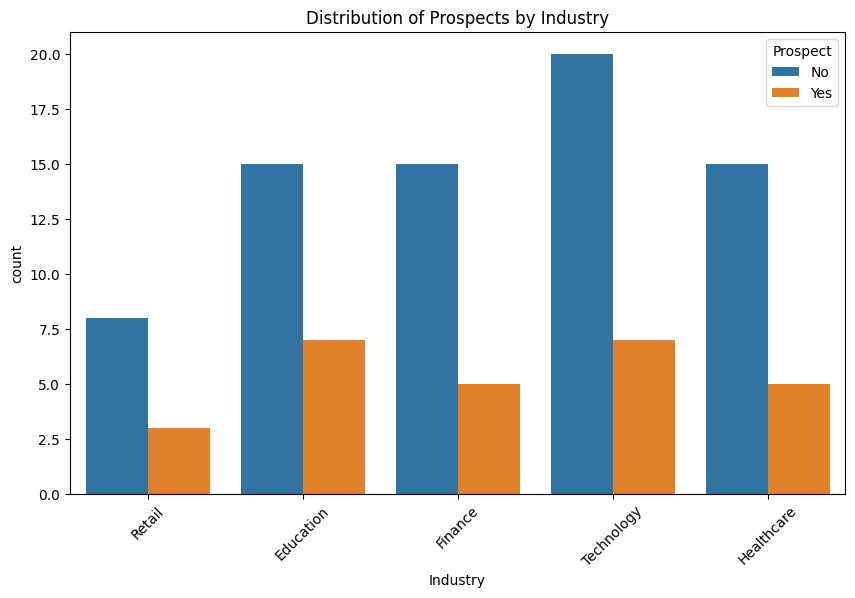

In [36]:
# Distribution of prospects by industry
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Industry', hue='Prospect')
plt.title("Distribution of Prospects by Industry")
plt.xticks(rotation=45)
plt.show()

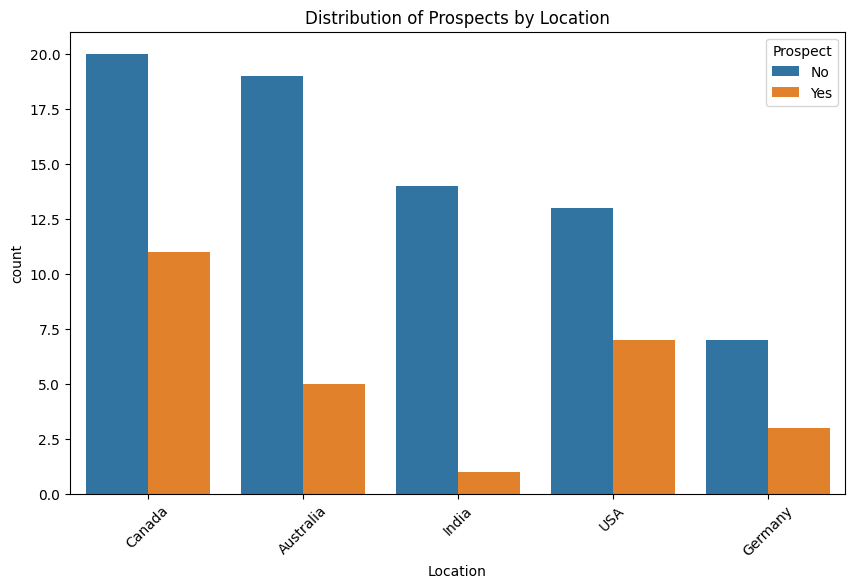

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Distribution of prospects by location
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Location', hue='Prospect')
plt.title("Distribution of Prospects by Location")
plt.xticks(rotation=45)
plt.show()

# 9. Download the Processed Data (if using Colab)
files.download("Processed_Prospect_Companies.csv")